In [80]:
import pandas as pd
import csv

DATA_DIR = '/Users/wojtek/Documents/Portfolio/datasets/aapl_shares/'
EQUITIES_DATASET = 'us_equities_news_dataset.csv'
STOCK_PRICE_DATASET = 'AAPL.csv'

In [81]:
#to visualize the whole columns content
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Preprocessing

In [82]:
import pandas as pd
import numpy as np
import regex as re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.text import Text
 
lemmatizer = WordNetLemmatizer()

# 1. Loading the datasets
news_data = pd.read_csv(DATA_DIR + EQUITIES_DATASET)
stock_data = pd.read_csv(DATA_DIR + STOCK_PRICE_DATASET)

### Filtering

#### Drop duplicates

In [83]:
news_data = news_data.dropna(subset=['content'])
news_data = news_data.drop_duplicates(subset='title', keep='first')

#### Finding articles featuring apple in their content

In [84]:
filtered_news_articles = news_data[(news_data['ticker'] == 'AAPL') |
                (news_data['title'].str.contains(r'\bApple\b', case=True)) | 
                (news_data['content'].str.contains(r'\bApple\b', case=True))]

### Preprocessing

In [91]:
import string
from unidecode import unidecode
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def filter_word_from_corpus(data, words):
    """
    Filters out specific words from the corpus.
    Parameters:
    - data : The corpus, represented by a list of list of tokens.
    - words : The words to be filtered. Either a list of tokenized words or a single word.
    Returns:
    - List[List[str]]: Filtered data where specified words have been removed.
    Example:
    >>> data = [["apple", "orange"], ["apple", "banana"]]
    >>> filter_data(data, "apple")
    [["orange"], ["banana"]]
    """
    # Ensure words is a list, even if a single string is passed
    if isinstance(words, str):
        words = [words]
    # Filter words from data
    filtered_data = [[token for token in row if token not in words] for row in data]
    return filtered_data

def preprocess_texts(texts, n=0):
    processed_texts = []
    for text in texts:
        # lowercasing, keep text only, remove accents, tokenization
        tokens = [word for word in word_tokenize(re.sub(r'[^a-zA-Z\s]', '', unidecode(text.lower())))]
        # stopword removal
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        processed_texts.append(tokens)
    # remove top-n% and bottom-n% words
    if n > 0:
        word_freq = Counter([word for sentence in processed_texts for word in sentence])
        top_n = set([word for word, _ in word_freq.most_common(int(n/100*len(word_freq)))])
        bottom_n = set([word for word, _ in word_freq.most_common()[:-int(n/100*len(word_freq))-1:-1]])
        processed_texts = [[word for word in sentence if word not in top_n and word not in bottom_n] for
        sentence in processed_texts]
    return processed_texts

def remove_short_tokens(texts, min_length=3):
    """
    Removes tokens from the text that have a length lower than the specified threshold.

    Parameters:
    texts (list of list of str): The list of tokenized texts.
    min_length (int): The minimum length threshold for tokens. Default is 3.

    Returns:
    list of list of str: The list of tokenized texts with short tokens removed.
    """
    return [[token for token in tokens if len(token) >= min_length] for tokens in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wojtek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wojtek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wojtek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
filtered_news_articles.head(1)

,id,ticker,title,category,content,release_date,provider,url,article_id
24,221539,NIO,A Central Bank War Just Started And Its Good For Stocks,opinion,ECB Effects\nThe move in the euro was huge falling over 200 pips huge But the most important piece here is that the euro broke essential support at 1 13 I wrote up my thoughts on why the euro could even fall to parity and why the Fed may need to cut rates later this year \n\nDraghi was very dovish today with his outlook so much so that German Bunds fell to around 6 bps from 13 bps Our 10 year fell to 2 63 A break below 2 62 sends the 10 year back to its December lows \n\nOver time investors should come to realize that rates will remain low and that the Fed will need to stay on hold to avoid having the dollar strengthen too much Should the dollar rise it will kill off whatever inflationary forces there are while hurting our multinational companies The result may be a Fed that needs to cut rates by late 2019 to keep the dollar in line versus the euro and avoid this scenario \nBut this should be good for stocks as investors move out on the risk curve and low interest rate foster multiple expansion for stocks \nS P 500 SPY NYSE SPY \nStocks did end up falling some with the S P 500 dropping by roughly 80 basis point to 2 748 Certainly not the end of days but a decline worth noting The S P 500 did manage to close at a pretty substantial level of support around 2 750 Remember this was one of the reasons I had some hesitation a couple of weeks backs about the market and a level I tried to keep in the back of everyone s mind Now that gap is filled what next \nFrom my point of view it is now crucial for the S P 500 to hold support around this 2 735 level A drop below that support zone gets things moving to the downside with the potential for a drop below 2 700 \n\nRussell 2000 IWM \nThe Russell s decline was the most noticeable because it did fall below that level of support I had noted last night at 1 535 The Russell s drop has me much more concerned than the S P 500 at this point The chart now suggestions that the index could drop by another 2 to around 1 492 There is a minor support level about at 1 520 but I have no confidence in that level acting as anything substantial \nI know 2 doesn t sound like much but consider that the Russell was at 1 600 on February 23 When you think about that way we are talking about a nearly 7 drop from that peak \nYou can even make a case for the Russell to drop back to around 1 450 a full 9 off those February highs But it would create a very bullish pattern known a reverse head and shoulders That could eventually lead to higher prices down the road \nAgain my outlook for the full year continues to suggest stock will continue to head higher That is not to say there will not be pullbacks along the way \n\nNio NYSE NIO \nNio continues to deflate and it looks like it may be possible now for a drop to 6 50 \n\nSplunk NASDAQ SPLK \nSplunk is nearing a potentially big breakdown should it fall below 123 potentially to 108 \n\nFacebook NASDAQ FB \nFacebook was lower today and the stock is looking more and more as if filling the gap at 148 is around the corner \n\nNetflix NASDAQ NFLX \nNetflix was also down today falling back to 352 The stock has looked very weak and a drop to 337 seems possible still \n\nApple NASDAQ AAPL \nApple got as high as 178 pretty close but no cigar to the 182 I was looking for Now the stock is sitting on an uptrend and a break of that uptrend pushes the shares back to 165 \n\nJD JD \nJD is still looking as if it could drop to around 26 over the coming days \n\nNVIDIA Corporation NASDAQ NVDA \nFinally Nvidia did fall below 150 today and I m still looking for that 139 to 140 region \n\nSee you on Jobs Friday \nOriginal post,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-bank-war-just-started-and-its-good-for-stocks-200395687,200395687


In [92]:
# Apply preprocessing
#filtered_news_articles['content'] = preprocess_texts(filtered_news_articles['content'])
filtered_news_articles['content'] = remove_short_tokens(filtered_news_articles['content'], min_length=3)
# Filter specific words
# words_to_remove = []  # Example words to remove
# filtered_news_articles['content'] = filter_word_from_corpus(filtered_news_articles['content'], words_to_remove)

/var/folders/3c/dwwhhxpn5v1_gqzr69zmy0900000gn/T/ipykernel_90058/2079015484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_news_articles['content'] = remove_short_tokens(filtered_news_articles['content'], min_length=3)


In [93]:
filtered_news_articles.head(1)

,id,ticker,title,category,content,release_date,provider,url,article_id
24,221539,NIO,A Central Bank War Just Started And Its Good For Stocks,opinion,"[ecb, effects, move, euro, huge, falling, pips, huge, important, piece, euro, broke, essential, support, wrote, thoughts, euro, could, even, fall, parity, fed, may, need, cut, rates, later, year, draghi, dovish, today, outlook, much, german, bunds, fell, around, bps, bps, year, fell, break, sends, year, back, december, lows, time, investors, come, realize, rates, remain, low, fed, need, stay, hold, avoid, dollar, strengthen, much, dollar, rise, kill, whatever, inflationary, forces, hurting, multinational, companies, result, may, fed, needs, cut, rates, late, keep, dollar, line, versus, euro, avoid, scenario, good, stocks, investors, move, risk, curve, low, interest, rate, foster, multiple, expansion, stocks, spy, nyse, ...]",2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-bank-war-just-started-and-its-good-for-stocks-200395687,200395687


### Merge open & close data

In [94]:
# 3. Merging with stock data to get the stock prices on the article publication day
merged_data = filtered_news_articles.merge(stock_data, left_on='release_date', right_on='Date', how='left')

merged_data = merged_data.dropna(subset=['Open', 'Close'])

### Feature engineering + label encoding

In [95]:
merged_data['label'] = (merged_data['Close'] >= merged_data['Open']).astype(int)
merged_data['category'] = merged_data['category'].apply(lambda x: 1 if x == 'news' else (0 if x == 'opinion' else x))

## Descriptive analysis

In [96]:
number_of_articles = len(merged_data)
print(number_of_articles)

24604


In [98]:
average_words_per_article = merged_data['content'].apply(len).mean()
print(average_words_per_article)

363.3811168915623


In [104]:
def plot_top_words(top_words, title, subplot_number):
    # Split words and their counts into separate lists for plotting
    words, counts = zip(*top_words)
    
    plt.subplot(1, 2, subplot_number)  # 1 row, 2 columns, subplot_number
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.title(title)
    plt.gca().invert_yaxis()  # Display word with the highest count at the top

In [103]:
from collections import Counter

# Flatten the 'content' lists to get all words in a single list
all_words = [word for sublist in merged_data['content'] for word in sublist]

# Count occurrences of each word
word_counts = Counter(all_words)

# Get the top 100 most common words
top_100_words = word_counts.most_common(100)
top_100_words

[('year', 84103),
 ('company', 71902),
 ('apple', 67440),
 ('nasdaq', 66118),
 ('zacks', 58250),
 ('earnings', 57832),
 ('market', 54154),
 ('billion', 47449),
 ('quarter', 46624),
 ('stock', 44755),
 ('growth', 40197),
 ('nyse', 40065),
 ('stocks', 39936),
 ('also', 39132),
 ('new', 39011),
 ('said', 37645),
 ('million', 35642),
 ('inc', 34785),
 ('expected', 31977),
 ('last', 31281),
 ('shares', 26447),
 ('aapl', 26175),
 ('companies', 25670),
 ('could', 25669),
 ('investors', 25294),
 ('percent', 25292),
 ('rank', 25040),
 ('years', 24847),
 ('buy', 23860),
 ('sales', 23810),
 ('may', 23306),
 ('one', 22875),
 ('per', 22700),
 ('price', 22316),
 ('share', 21911),
 ('time', 21429),
 ('report', 21009),
 ('china', 20474),
 ('see', 20238),
 ('first', 20131),
 ('would', 19849),
 ('iphone', 19792),
 ('week', 19642),
 ('estimate', 19506),
 ('index', 19305),
 ('consensus', 18721),
 ('higher', 18674),
 ('strong', 18674),
 ('data', 18634),
 ('like', 18481),
 ('technology', 18439),
 ('revenue'

11268 13336


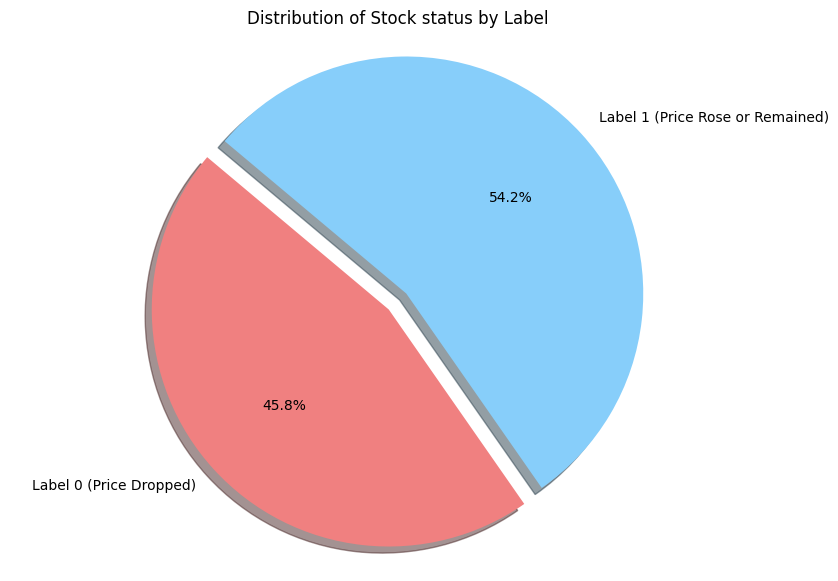

In [110]:
# Count the number of articles with label 0
count_label_0 = len(merged_data[merged_data['label'] == 0])

# Count the number of articles with label 1
count_label_1 = len(merged_data[merged_data['label'] == 1])

labels = ['Label 0 (Price Dropped)', 'Label 1 (Price Rose or Remained)']
sizes = [count_label_0, count_label_1]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice for emphasis

print(count_label_0, count_label_1)
# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Stock status by Label')
plt.show()

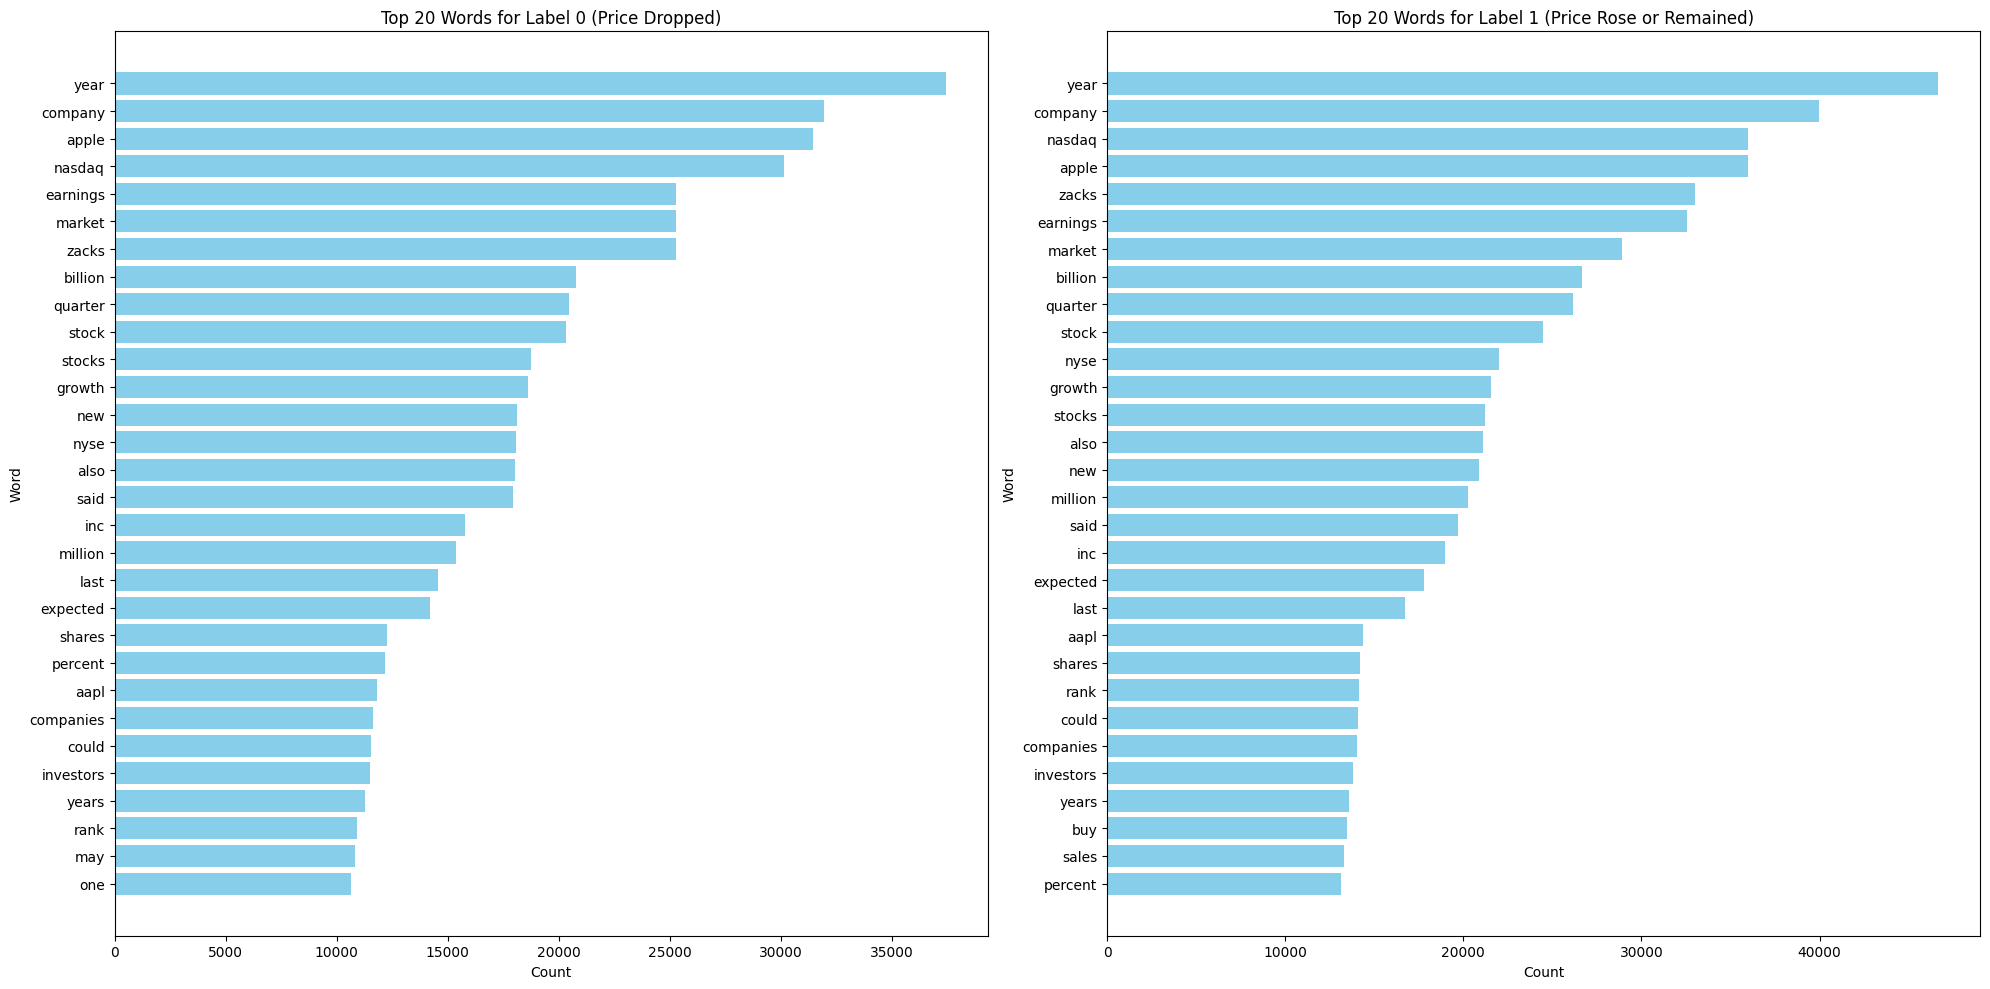

In [107]:
def get_top_words_for_label(df, label):
    # Filter the DataFrame for the given label
    label_df = df[df['label'] == label]
    
    # Flatten the 'content' lists to get all words in a single list for the label
    all_words = [word for sublist in label_df['content'] for word in sublist]
    
    # Count occurrences of each word
    word_counts = Counter(all_words)
    
    # Get the top 20 most common words for the label
    return word_counts.most_common(30)

# Get the top 20 words for label 0 (stock price dropped)
top_words_label_0 = get_top_words_for_label(merged_data, 0)

# Get the top 20 words for label 1 (stock price rose or remained the same)
top_words_label_1 = get_top_words_for_label(merged_data, 1)

plt.figure(figsize=(20, 10))
plot_top_words(top_words_label_0, 'Top 20 Words for Label 0 (Price Dropped)', 1)
plot_top_words(top_words_label_1, 'Top 20 Words for Label 1 (Price Rose or Remained)', 2)

plt.tight_layout()
plt.show()

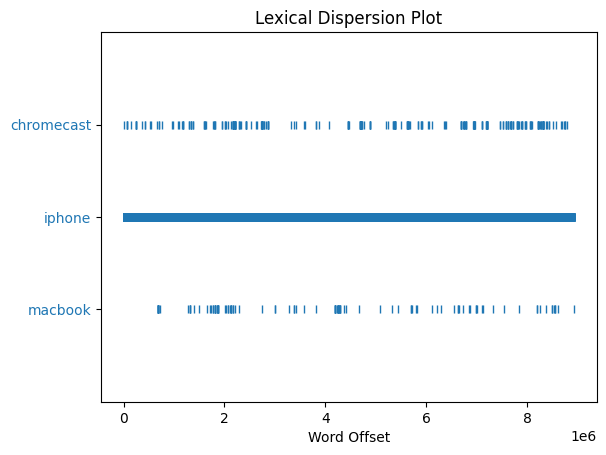

In [113]:
# Define the words to be analyzed
target_words = ['macbook', 'iphone', 'chromecast']

merged_data = merged_data.sort_values(by='release_date', ascending=True)

# Tokenize the text content of the articles (assuming each article is a list of words)
tokens = [word for article in merged_data['content'] for word in article]

# Create a Text object for analysis
text = Text(tokens)

# Create a dispersion plot for the target words
text.dispersion_plot(target_words)

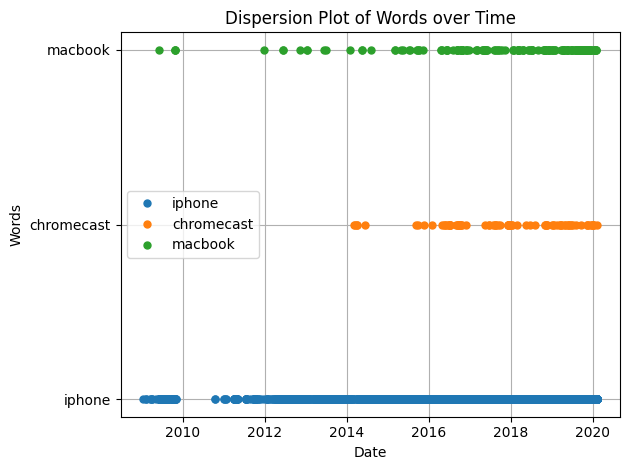

In [116]:
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])

target_words = ['iphone', 'chromecast', 'macbook']  # Example stemmatized words

for word in target_words:
    occurrences = merged_data[merged_data['content'].apply(lambda words: word in words)]['Date']
    y = [target_words.index(word) for _ in occurrences]
    plt.plot(occurrences, y, 'o', label=word, markersize=5)

plt.yticks(range(len(target_words)), target_words)
plt.xlabel('Date')
plt.ylabel('Words')
plt.title('Dispersion Plot of Words over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Document vectoring

In [ ]:
# 7. Creating Document Embeddings
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words and get the mean of the remaining word vectors
    return np.mean([word2vec_model.wv[word] for word in doc if word in word2vec_model.wv.index_to_key], axis=0)

In [ ]:
# 6. Training the Word2Vec Model (using Skip-Gram)
model = Word2Vec(sentences=merged_data['processed_content'], vector_size=100, window=5, min_count=5, sg=1, workers=4)
model.train(merged_data['processed_content'], total_examples=model.corpus_count, epochs=10)

merged_data['doc_vector'] = merged_data['processed_content'].apply(lambda x: document_vector(model, x))

In [ ]:
# 6. Training the Word2Vec Model (using CBow)
model_cbow = Word2Vec(sentences=merged_data['processed_content'], vector_size=100, window=5, min_count=5, workers=4)
model_cbow.train(merged_data['processed_content'], total_examples=model_cbow.corpus_count, epochs=10)

merged_data['doc_vector_cbow'] = merged_data['processed_content'].apply(lambda x: document_vector(model_cbow, x))

In [ ]:
len(merged_data)

24604

In [ ]:
merged_data_sample = merged_data.sample(5000)
merged_data_sample.to_csv('final-data.csv')

## Model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def grid_search_evaluation(model, grid_params, x_train, y_train, x_test, y_test):
    """
    Perform grid search for the given model and evaluate its performance on the test set.
    
    Parameters:
    - model: The machine learning model for which grid search is to be performed.
    - grid_params: Dictionary containing the hyperparameters for grid search.
    - x_train, y_train: Training data.
    - x_test, y_test: Testing data.
    
    Returns:
    - best_params: Best hyperparameters from the grid search.
    - accuracy: Accuracy of the model on the test set.
    - classification_rep: Classification report of the model on the test set.
    """
    
    # Check if the model has a 'fit' method
    if not hasattr(model, 'fit'):
        raise ValueError("Model must have a 'fit' method:", model)
    
    # Initialize grid search with cross-validation
    grid_search = GridSearchCV(model, grid_params, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    
    # Fit the model on the training data
    grid_search.fit(x_train, y_train)
    
    # Predict using the best model
    y_pred = grid_search.best_estimator_.predict(x_test)
    
    # Calculate accuracy
    accuracy = (y_pred == y_test).mean()
    
    # Generate classification report
    classification_rep = classification_report(y_test, y_pred)
    
    return grid_search.best_params_, accuracy, classification_rep


def extract_macro_avg_precision_recall(report):
    """Extract macro-average precision and recall from classification report."""
    for line in report.split("\n"):
        if "macro avg" in line:
            parts = line.split()
            precision = float(parts[2])
            recall = float(parts[3])
            return precision, recall
    return None, None


In [ ]:
data_to_use = merged_data

doc_vector_df_cbow = pd.DataFrame(data_to_use['doc_vector_cbow'].tolist(), index=data_to_use.index)
doc_vector_df_cbow.columns = doc_vector_df_cbow.columns.astype(str)
doc_vector_df_cbow['category'] = data_to_use['category']

X_cbow = doc_vector_df_cbow

doc_vector_df_skip = pd.DataFrame(data_to_use['doc_vector_cbow'].tolist(), index=data_to_use.index)
doc_vector_df_skip.columns = doc_vector_df_skip.columns.astype(str)
doc_vector_df_skip['category'] = data_to_use['category']

X_skip = doc_vector_df_skip
y = data_to_use['label']

X_train_skip, X_test_skip, y_train_skip, y_test_skip = train_test_split(X_skip, y, test_size=0.3, random_state=42)
X_train_cbow, X_test_cbow, y_train_cbow, y_test_cbow = train_test_split(X_cbow, y, test_size=0.3, random_state=42)

In [ ]:
# Hyperparameters for each model
params_dict = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GaussianNB': {},
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['saga']
    }
}

# Models
models_dict = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42)
}

# Data
data_dict = {
    'skip': (X_train_skip, y_train_skip, X_test_skip, y_test_skip),
    'cbow': (X_train_cbow, y_train_cbow, X_test_cbow, y_test_cbow)
}

# Store results
results = {}

# Loop through models and data types
for model_name, model in models_dict.items():
    for data_name, (X_train, Y_train, X_test, Y_test) in data_dict.items():
        best_params, accuracy, report = grid_search_evaluation(model, params_dict[model_name], X_train, Y_train, X_test, Y_test)
        
        # Store results in the dictionary
        results[(model_name, data_name)] = {
            'Best Parameters': best_params,
            'Accuracy': accuracy,
            'Classification Report': report
        }

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


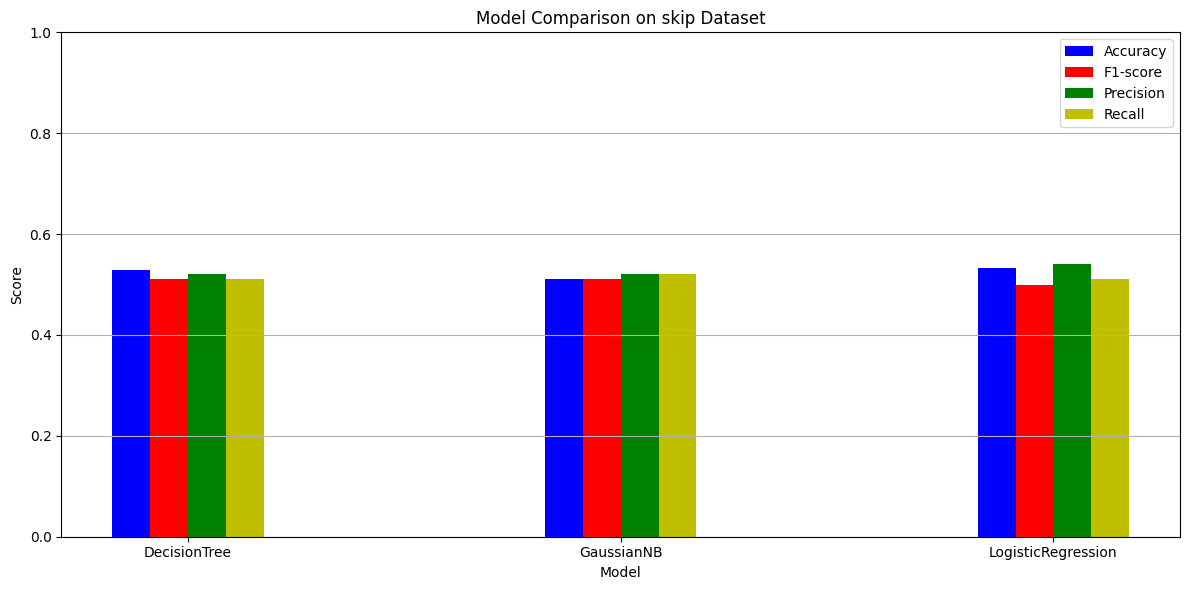

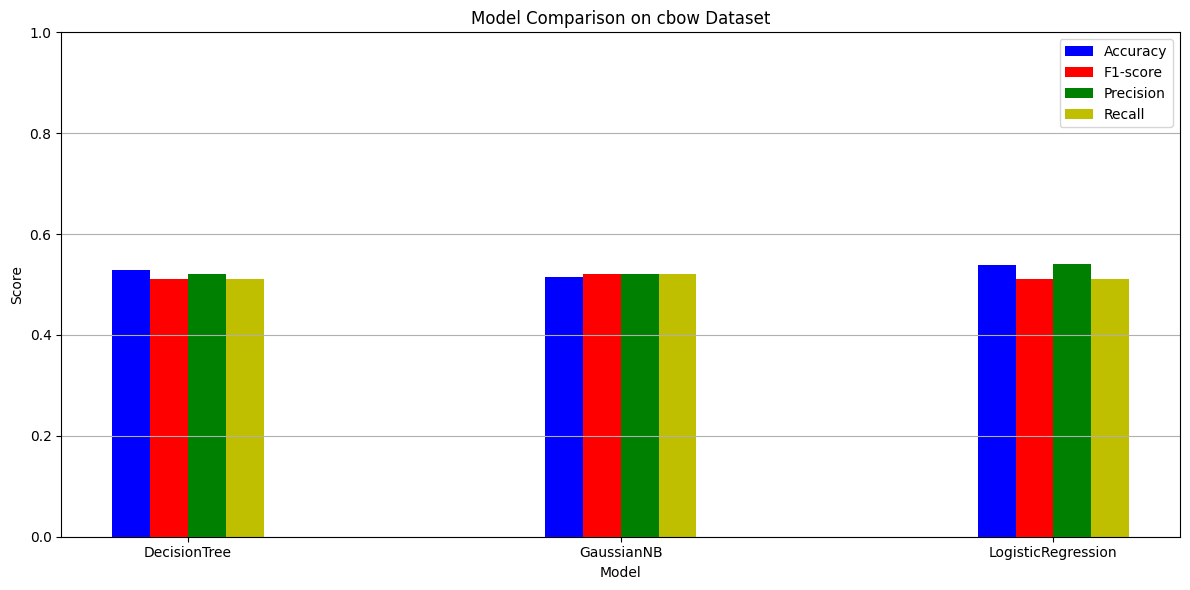

In [ ]:
# Extracting precision and recall for skip and cbow datasets
precisions_skip = [extract_macro_avg_precision_recall(results[(model, 'skip')]['Classification Report'])[0] for model in models]
recalls_skip = [extract_macro_avg_precision_recall(results[(model, 'skip')]['Classification Report'])[1] for model in models]
precisions_cbow = [extract_macro_avg_precision_recall(results[(model, 'cbow')]['Classification Report'])[0] for model in models]
recalls_cbow = [extract_macro_avg_precision_recall(results[(model, 'cbow')]['Classification Report'])[1] for model in models]

def plot_comparison(dataset, accuracies, f1_scores, precisions, recalls):
    """Plot comparison for a given dataset based on multiple metrics."""
    plt.figure(figsize=(12, 6))
    index = np.arange(len(models))
    
    # Setting width for individual bars
    single_bar_width = bar_width / 4
    
    # Bar for Accuracies
    plt.bar(index, accuracies, single_bar_width, color='b', label='Accuracy')
    # Bar for F1-scores
    plt.bar(index + single_bar_width, f1_scores, single_bar_width, color='r', label='F1-score')
    # Bar for Precisions
    plt.bar(index + 2*single_bar_width, precisions, single_bar_width, color='g', label='Precision')
    # Bar for Recalls
    plt.bar(index + 3*single_bar_width, recalls, single_bar_width, color='y', label='Recall')
    
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Model Comparison on {dataset} Dataset')
    plt.xticks(index + 1.5*single_bar_width, models)  # positioning model names in the middle
    plt.legend()
    plt.tight_layout()
    plt.ylim(0, 1)  # To set consistent y-axis limits for better comparison
    plt.grid(axis='y')
    plt.show()

# Plotting
plot_comparison('skip', accuracies_skip, f1_scores_skip, precisions_skip, recalls_skip)
plot_comparison('cbow', accuracies_cbow, f1_scores_cbow, precisions_cbow, recalls_cbow)
